In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df=pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")

In [34]:
import warnings
warnings.filterwarnings('ignore')


In [23]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.tolist()

['Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Deaths / 100 Cases',
 'Recovered / 100 Cases',
 'Deaths / 100 Recovered',
 'Confirmed last week',
 '1 week change',
 '1 week % increase',
 'WHO Region']

In [9]:
top_10=df[['Country/Region','Confirmed']].sort_values(by='Confirmed',ascending=False).head(10)
top_10

,Country/Region,Confirmed
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529
111,Mexico,395489
132,Peru,389717
35,Chile,347923
177,United Kingdom,301708
81,Iran,293606


Text(0.5, 0, 'Top 10 Most Affected Countries by COVID-19')

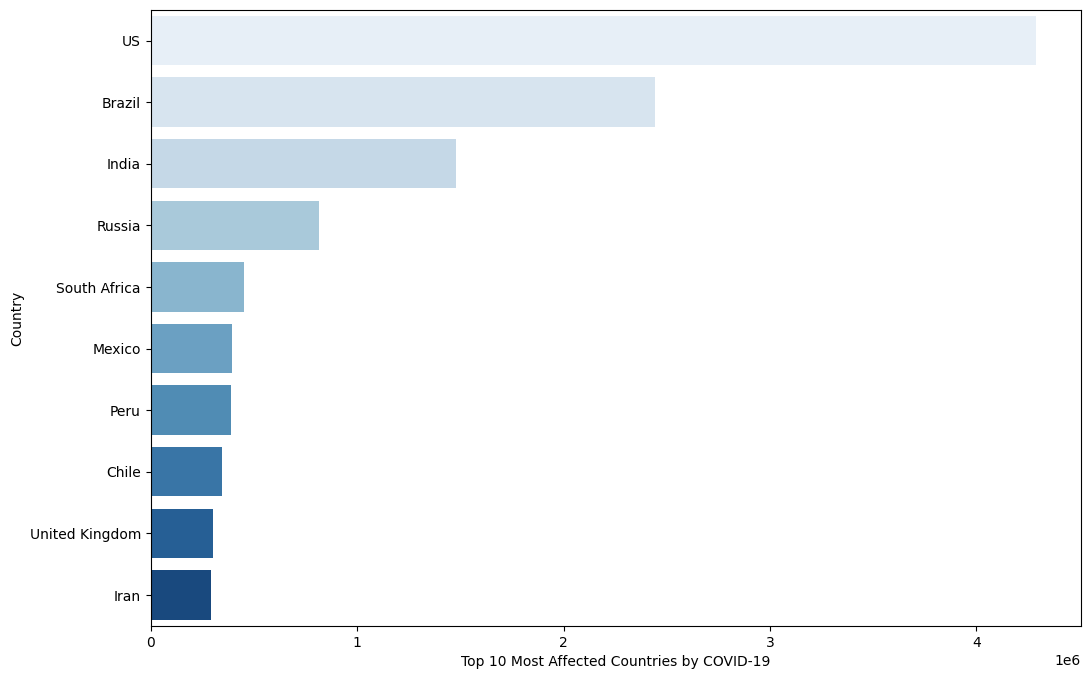

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10,x='Confirmed',y='Country/Region',palette="Blues")
plt.ylabel("Country")
plt.xlabel("Top 10 Most Affected Countries by COVID-19")

In [42]:
top_newcasese=df[['Country/Region','New cases']].sort_values(by='New cases',ascending=False).head(10)

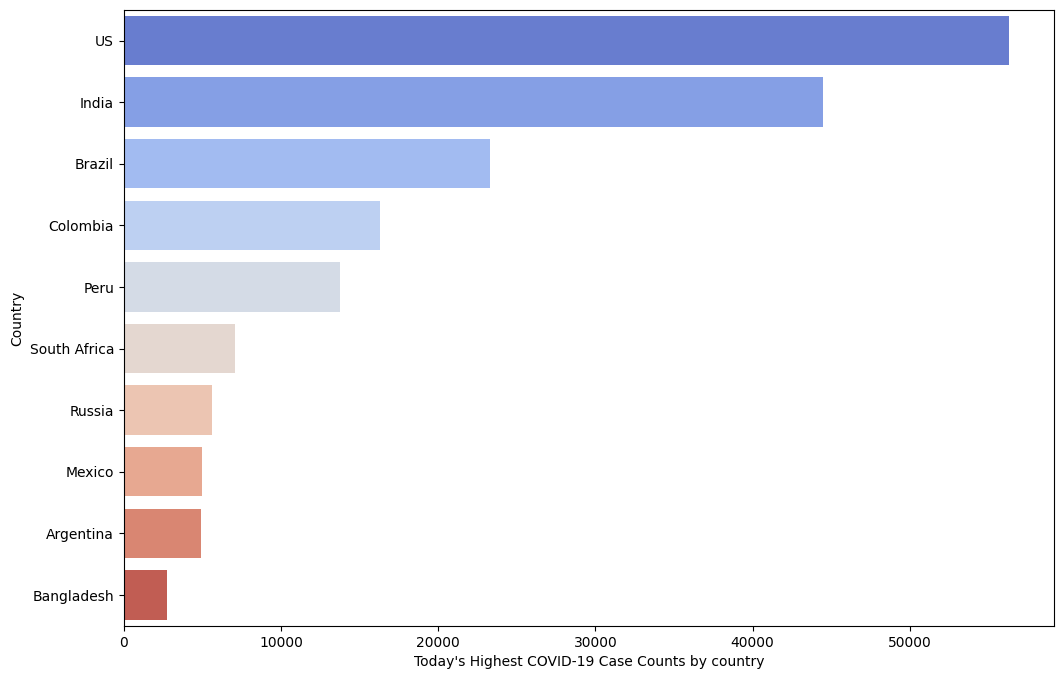

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_newcasese,x='New cases',y='Country/Region',palette="coolwarm")
plt.ylabel("Country")
plt.xlabel("Today's Highest COVID-19 Case Counts by country")
plt.show()

In [14]:
lowest_newcases=df[df['New cases']>=1][['Country/Region','New cases']].sort_values(by='New cases',ascending=True).head(10)

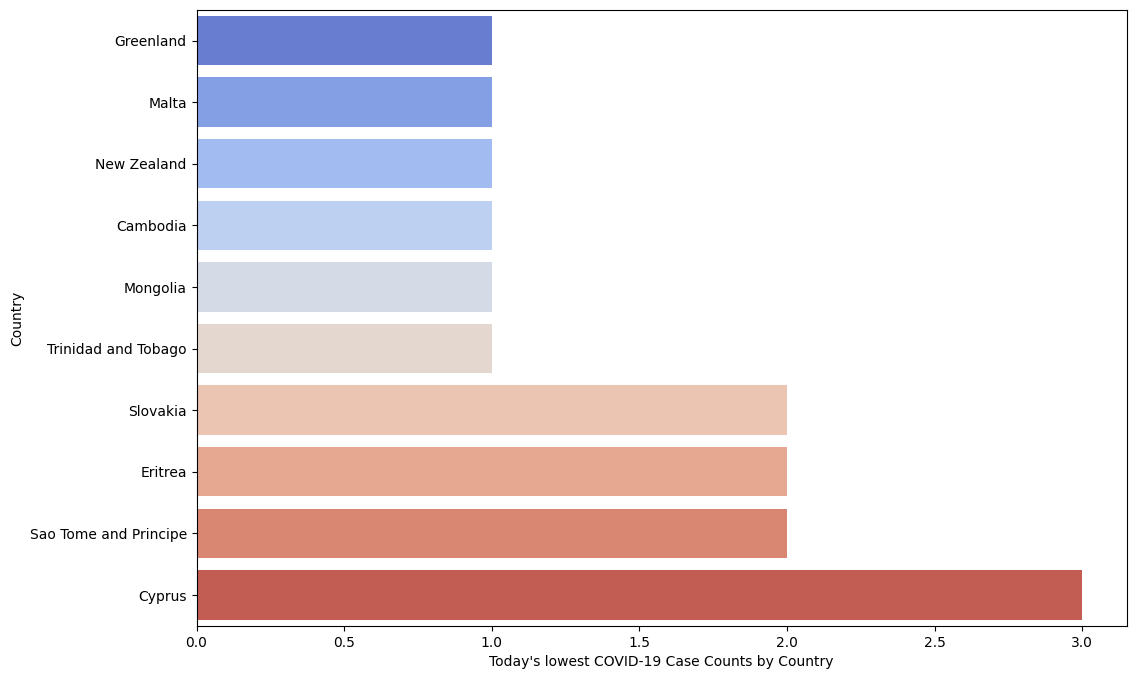

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(data=lowest_newcases,x='New cases',y='Country/Region',palette="coolwarm")
plt.ylabel("Country")
plt.xlabel("Today's lowest COVID-19 Case Counts by Country")
plt.show()

In [20]:
top_Death_ratio=df[['Country/Region','Deaths / 100 Cases']].sort_values(by='Deaths / 100 Cases',ascending=False).head(10)
top_Death_ratio

,Country/Region,Deaths / 100 Cases
184,Yemen,28.56
177,United Kingdom,15.19
16,Belgium,14.79
85,Italy,14.26
61,France,13.71
77,Hungary,13.40
120,Netherlands,11.53
111,Mexico,11.13
157,Spain,10.44
183,Western Sahara,10.00


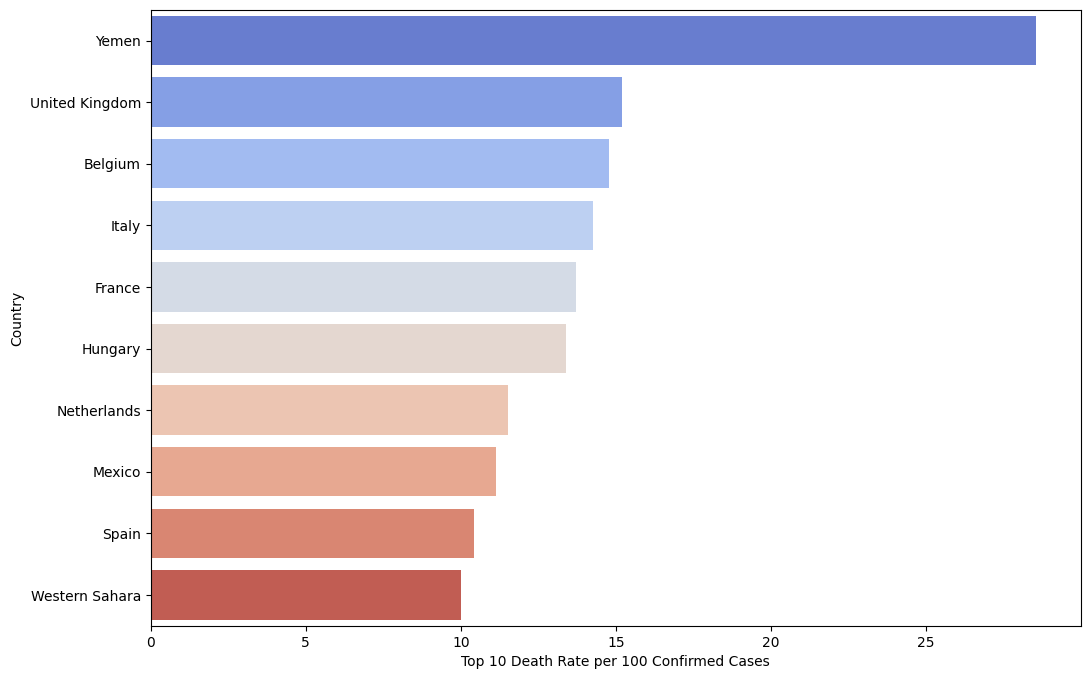

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_Death_ratio,x='Deaths / 100 Cases',y='Country/Region',palette="coolwarm")
plt.ylabel("Country")
plt.xlabel("Top 10 Death Rate per 100 Confirmed Cases")
plt.show()

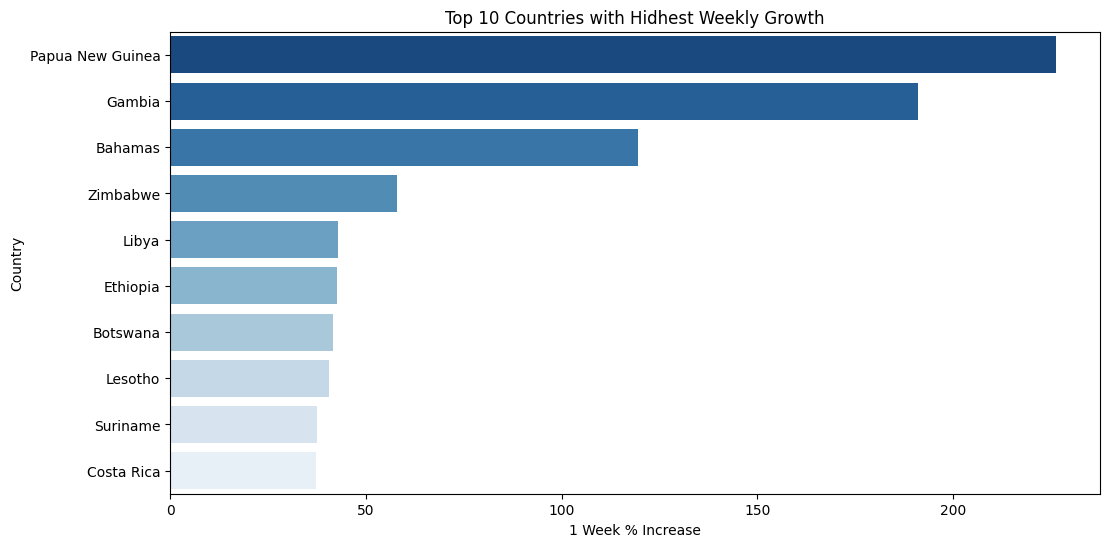

In [28]:
top_growth=df[['Country/Region','1 week % increase']].sort_values(by='1 week % increase',ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='1 week % increase',y='Country/Region', data=top_growth,palette='Blues_r')
plt.xlabel("1 Week % Increase")
plt.ylabel("Country")
plt.title("Top 10 Countries with Hidhest Weekly Growth")
plt.show()

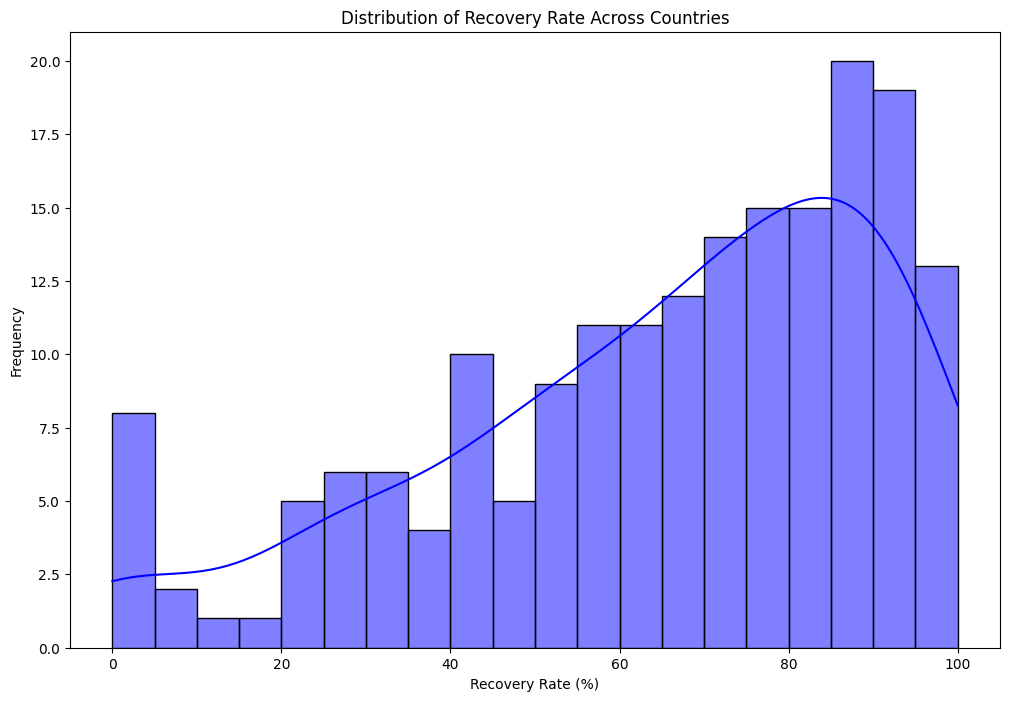

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df['Recovered / 100 Cases'], bins=20, kde=True,color='blue')
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Recovery Rate Across Countries")
plt.show()

In [36]:
zero_active=df[df['Active']==0]
zero_active

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.0,Western Pacific
49,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.0,Americas
69,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.0,Americas
75,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.0,Europe
143,San Marino,699,42,657,0,0,0,0,6.01,93.99,6.39,699,0,0.0,Europe


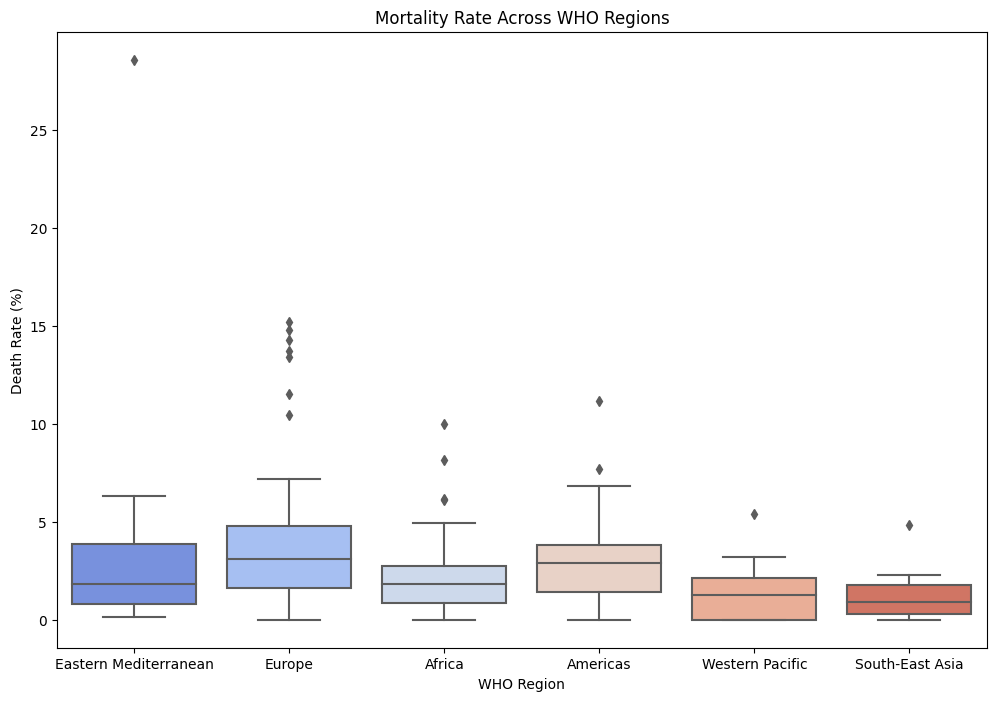

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['WHO Region'],y=df['Deaths / 100 Cases'],palette='coolwarm')
plt.xlabel("WHO Region")
plt.ylabel("Death Rate (%)")
plt.title("Mortality Rate Across WHO Regions")
plt.show()

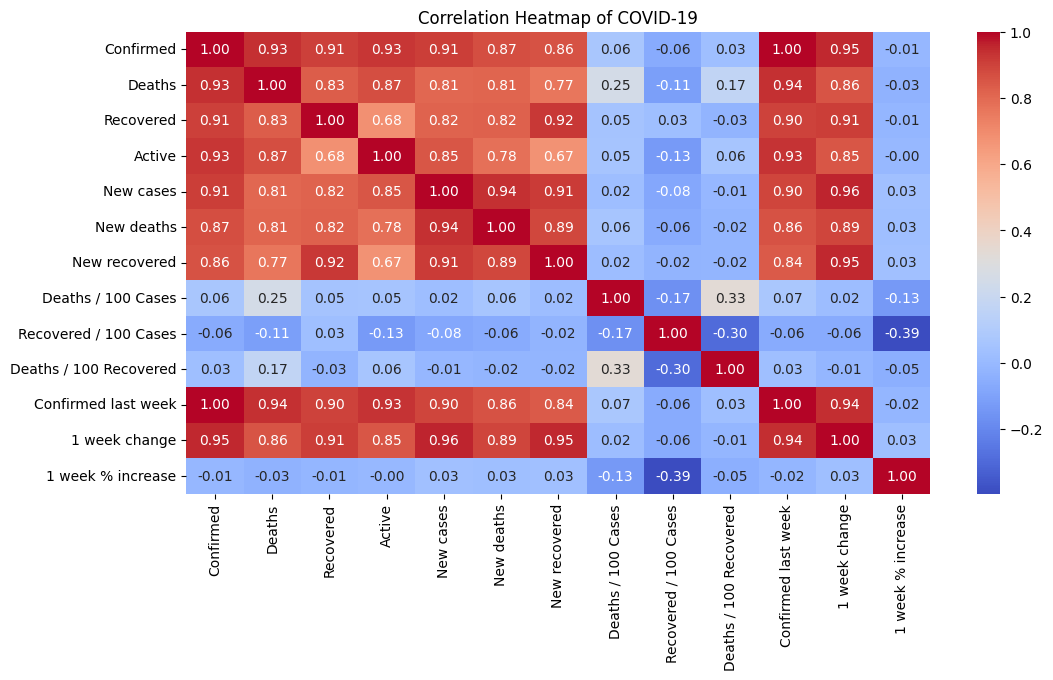

In [39]:
numeric_df=df.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap of COVID-19")
plt.show()